# Лабораторная работа №3. Часть 2

## Кривошейкин Сергей Р3214

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt

Cчитываем данные из файла

In [2]:
data = pd.read_csv('4_f_1.csv', names = ['R'])
data

,R
0,866
1,927
2,924
3,892
4,897
...,...
295,842
296,829
297,806
298,883


##### 1.	По заданному массиву кардиоинтервалов рассчитать основные параметры вариабельности: среднее значение M, среднеквадратическое отклонение SDNN, коэффициент вариации CV. 

In [3]:
M = (data.R).mean()
SDNN = np.std(data.R)
CV = SDNN / M * 100
print(f'Среднее значение: {M}\nCреднеквадратическое отклонение: {SDNN}\nКоэффициент вариации: {CV}%')

Среднее значение: 840.22
Cреднеквадратическое отклонение: 66.71075575447585
Коэффициент вариации: 7.939677198171413%


##### 2. По заданному массиву кардиоинтервалов построить гистограмму с шагом 50 мс (0.05 с) 

Минимум = 662
Максимум = 1056



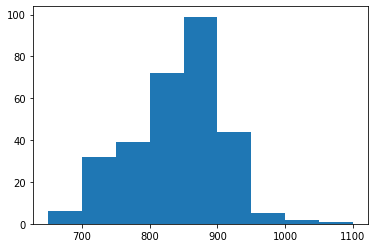

В интервале 650-700 количество значений = 6
В интервале 700-750 количество значений = 32
В интервале 750-800 количество значений = 39
В интервале 800-850 количество значений = 72
В интервале 850-900 количество значений = 99
В интервале 900-950 количество значений = 44
В интервале 950-1000 количество значений = 5
В интервале 1000-1050 количество значений = 2
В интервале 1050-1100 количество значений = 1


In [4]:
minimum = int((data.R).min() // 50 * 50)
maximum = int((data.R).max() // 50 * 50)
vals = []
amounts = []
print(f'Минимум = {(data.R).min()}\nМаксимум = {(data.R).max()}\n')
for i in range (minimum, maximum + 50, 50):
    amounts.append((data.R).where((data.R) >= i).where((data.R)<i+50).count())
    vals.append(i)
vals.append(maximum + 50)
plt.hist(x = (data.R), bins = vals)
plt.show()
for i in range(len(amounts)):
    print(f'В интервале {vals[i]}-{vals[i+1]} количество значений = {amounts[i]}')

##### 3.	По полученному графику определить амплитуду моды АMо, которая соответствует максимальному значению, и моду Mо – значение аргумента в точке максимума.

$\text{АМо} = \frac{99}{300} \cdot 100\% = 33\%$

$\text{Mo} = \frac{900+850}{2} = 875\text{мс}$

##### 4.	Определить вариационный размах MxDMn.

$\text{MxDMn} = 1056 - 662 = 394\text{мс}$

##### 5. Рассчитать индекс напряжения регуляторных систем ИН.

$\text{ИН} = \frac{\text{АМо}*100\%}{2*\text{Mo}*\text{MxDMn}} =\frac{0.33*100\%}{2*0.875*0.394} = 47.86\text{y.e.}$

##### 6. По заданному массиву кардиоинтервалов построить график автокоррелограммы

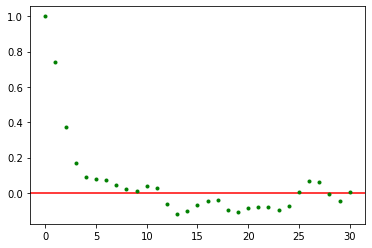

In [5]:
def r_0_k(R, k, m):
    r = R.to_numpy()
    rrr = (m * sum(r[0:m]*r[k:m+k]) - sum(r[0:m]) * sum(r[k:m+k])) /\
        math.sqrt((m * sum(r[0:m] ** 2) - sum(r[0:m]) ** 2) * (m * sum(r[k:k+m] ** 2) - sum(r[k:k+m]) ** 2))
    return rrr
def draw_autocorr(R, k_range):
    x = []
    y = []
    n = len(R)
    for k in range(0, k_range+1):
        x.append(k)
        y.append(r_0_k(R, k, n-k))
    plt.axhline(y=0, color='r', linestyle='-')
    plt.plot(x, y, 'g.')
    plt.show
draw_autocorr(data.R, 30)

##### 7. Рассчитать значение коэффициента корреляции после первого сдвига СС1 и число сдвигов до первого нулевого значения коэффициента корреляции СС0. 

In [6]:
print(f'Коэффициент корреляции после первого сдвига:\nCC1 = {r_0_k(data.R, 1, len(data.R) - 1)}')

Коэффициент корреляции после первого сдвига:
CC1 = 0.7437720428042796


CC0 = 12 (см. график)

##### 8. По заданному массиву кардиоинтервалов построить корреляционную ритмограмму.

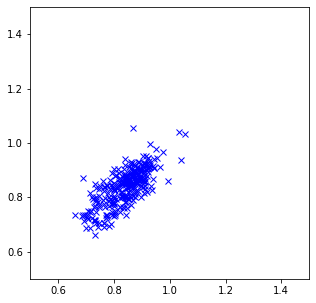

In [7]:
def ritmo(R):
    n = len(R)
    plt.figure(figsize=(5,5))
    plt.plot(R[0:n-1:]/1000,R[1:n:]/1000,'bx')
    plt.xlim(0.5, 1.5)
    plt.ylim(0.5, 1.5)
    plt.show()
ritmo(data.R)